pandas.isin

# ini adalah proses data cleansing khusus untuk data training

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dftrain = pd.read_csv('train.csv', delimiter = ';')

In [4]:
dftrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1.Handling Missing Value

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
dftrain.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### dataset tidak memiliki missing value

## 2.Handling Duplicated Data

In [7]:
dftrain.duplicated().sum()

0

### Data tidak ada yang duplicate

## 3.Handle Outliers

In [9]:
dftrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
dftrain.select_dtypes('int').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
nums = dftrain.select_dtypes('int').columns

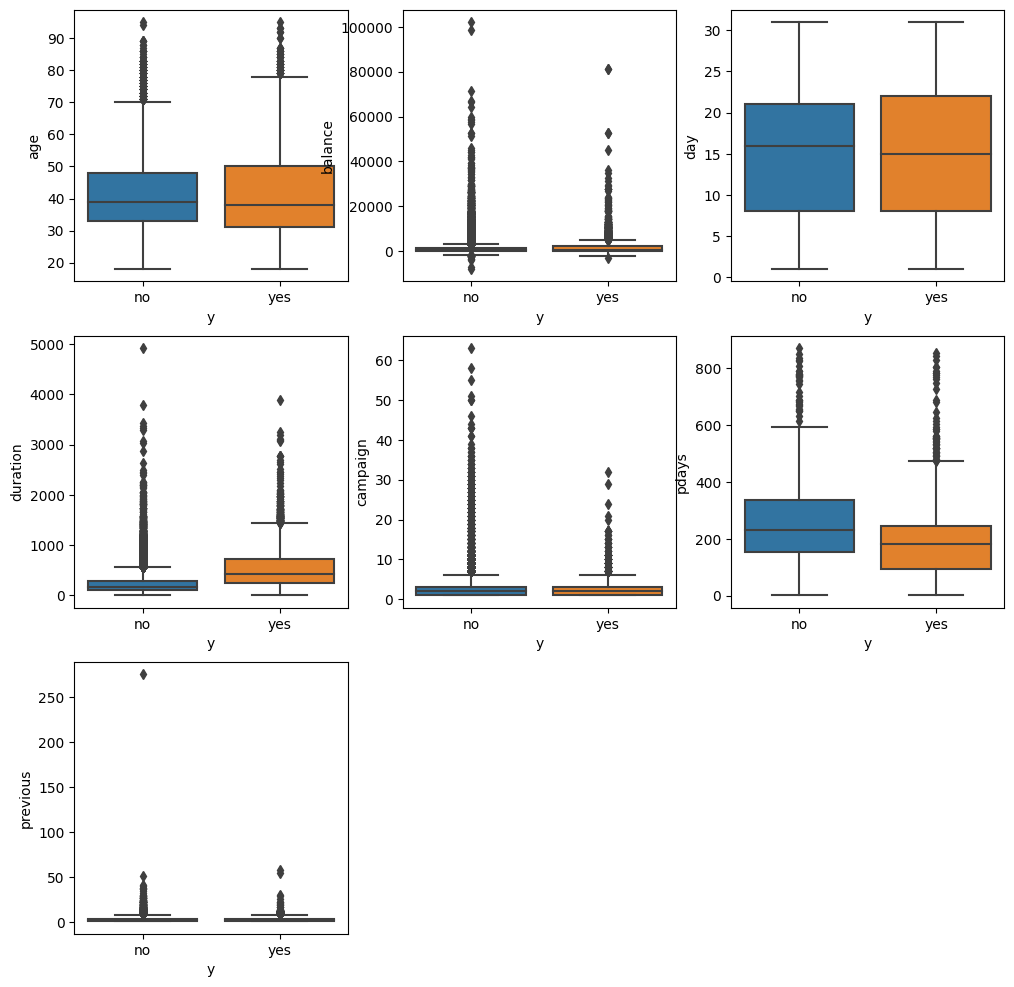

In [23]:
plt.figure(figsize = (12,12))
# for i in range(0, len(nums)):
#    plt.subplot(2, 4, idx + 1)
#     if i == 'pdays':
#         ax = sns.violinplot(data = dftrain, y = dftrain[dftrain[i] > -1][i], x = dftrain.y, inner = 'box')
#   plt.subplot(2, 4, i+1)
#   sns.boxplot(y = dftrain[nums[i]], color = 'yellow', orient = 'v')
#   plt.tight_layout()

for idx, col in enumerate(nums):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > -1][col], x = dftrain.y)#, inner = 'box')
    elif col == 'previous':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > 0][col], x = dftrain.y)#, inner = 'box')
    else:
        ax = sns.boxplot(data = dftrain, y = dftrain[col], x = dftrain.y)

### Handle outliers untuk data berdistribusi cukup normal(age aja)

In [24]:
from scipy import stats

In [25]:
print(f'jumlah baris sebelum memfilter outlier: {len(dftrain)}')
filtered_entries = np.array([True] * len(dftrain))

for col in ['age']:
    zscore = abs(stats.zscore(dftrain[col])) #hitung absolute z-scorenya
    filtered_entries = (zscore < 3) #keep yang kurang dari 3 absolute z-scorenya
dftrain = dftrain[filtered_entries] #filter, cuma ambil z-scorenya dibawah 3

print(f'jumlah baris setelah memfilter outlier : {len(dftrain)}')

jumlah baris sebelum memfilter outlier: 45211
jumlah baris setelah memfilter outlier : 44830


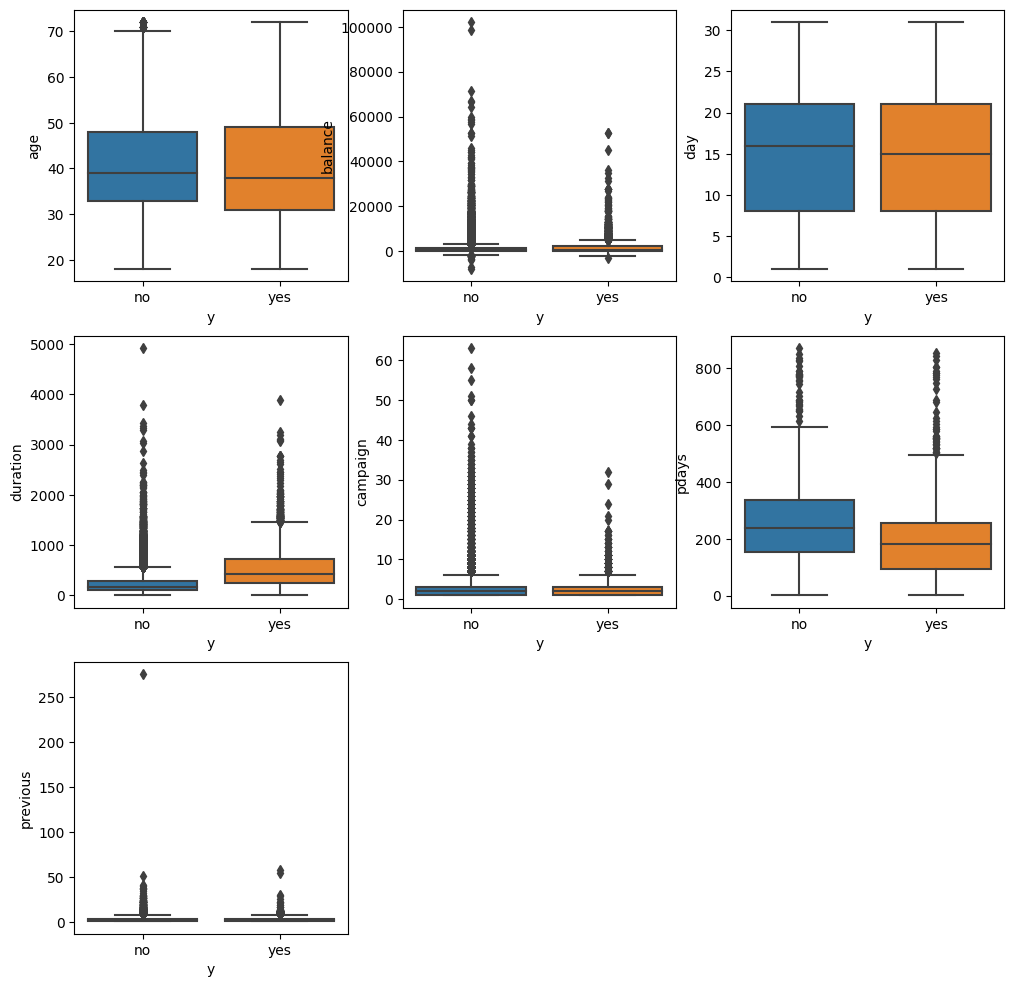

In [26]:
plt.figure(figsize = (12,12))
# for i in range(0, len(nums)):
#    plt.subplot(2, 4, idx + 1)
#     if i == 'pdays':
#         ax = sns.violinplot(data = dftrain, y = dftrain[dftrain[i] > -1][i], x = dftrain.y, inner = 'box')
#   plt.subplot(2, 4, i+1)
#   sns.boxplot(y = dftrain[nums[i]], color = 'yellow', orient = 'v')
#   plt.tight_layout()

for idx, col in enumerate(nums):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > -1][col], x = dftrain.y)#, inner = 'box')
    elif col == 'previous':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > 0][col], x = dftrain.y)#, inner = 'box')
    else:
        ax = sns.boxplot(data = dftrain, y = dftrain[col], x = dftrain.y)

#### age sudah cukup normal

### Handle outliers untuk data yang memiliki nilai ekstrem

#### Pake Percentile

In [28]:
print(f'jumlah baris sebelum memfilter outlier: {len(dftrain)}')
column_to_handle_outliers = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
filtered_entries = np.array([True] * len(dftrain))
lower_percentile = 1
upper_percentile = 99

for col in column_to_handle_outliers:
  lower_limit = np.percentile(dftrain[col], lower_percentile)
  upper_limit = np.percentile(dftrain[col], upper_percentile)
  filtered_entries = filtered_entries & ((dftrain[col] >= lower_limit) & (dftrain[col] <= upper_limit))

dftrain = dftrain[filtered_entries]

print(f'jumlah baris setelah memfilter outlier : {len(dftrain)}')

jumlah baris sebelum memfilter outlier: 41992
jumlah baris setelah memfilter outlier : 39228


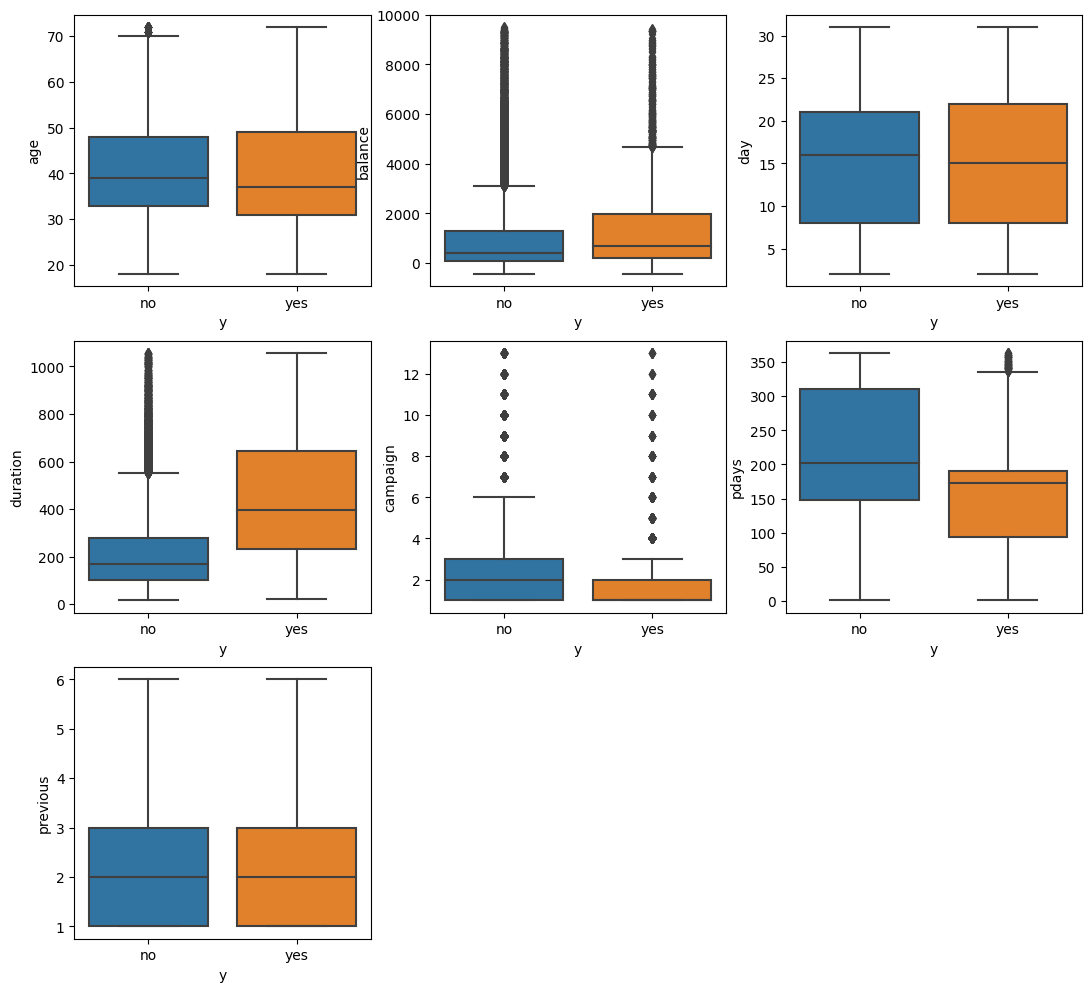

In [31]:
plt.figure(figsize = (13,12))
# for i in range(0, len(nums)):
#    plt.subplot(2, 4, idx + 1)
#     if i == 'pdays':
#         ax = sns.violinplot(data = dftrain, y = dftrain[dftrain[i] > -1][i], x = dftrain.y, inner = 'box')
#   plt.subplot(2, 4, i+1)
#   sns.boxplot(y = dftrain[nums[i]], color = 'yellow', orient = 'v')
#   plt.tight_layout()

for idx, col in enumerate(nums):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > -1][col], x = dftrain.y)#, inner = 'box')
    elif col == 'previous':
        ax = sns.boxplot(data = dftrain, y = dftrain[dftrain[col] > 0][col], x = dftrain.y)#, inner = 'box')
    else:
        ax = sns.boxplot(data = dftrain, y = dftrain[col], x = dftrain.y)

##### sudah jauh lebih baik

In [ ]:
# # capping - change the outlier values to upper (or) lower limit values
# column_to_handle_outliers = ['balance', 'duration', 'campaign', 'pdays', 'previous']
# lower_percentile = 1
# upper_percentile = 99

# for col in column_to_handle_outliers:
#   lower_limit = np.percentile(dftrain[col], lower_percentile)
#   upper_limit = np.percentile(dftrain[col], upper_percentile)
#   new_dftrain = dftrain.copy()
#   new_dftrain.loc[(new_dftrain[col]>high_limit), col] = upper_limit
#   new_dftrain.loc[(new_dftrain[col]<low_limit), col] = lower_limit


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


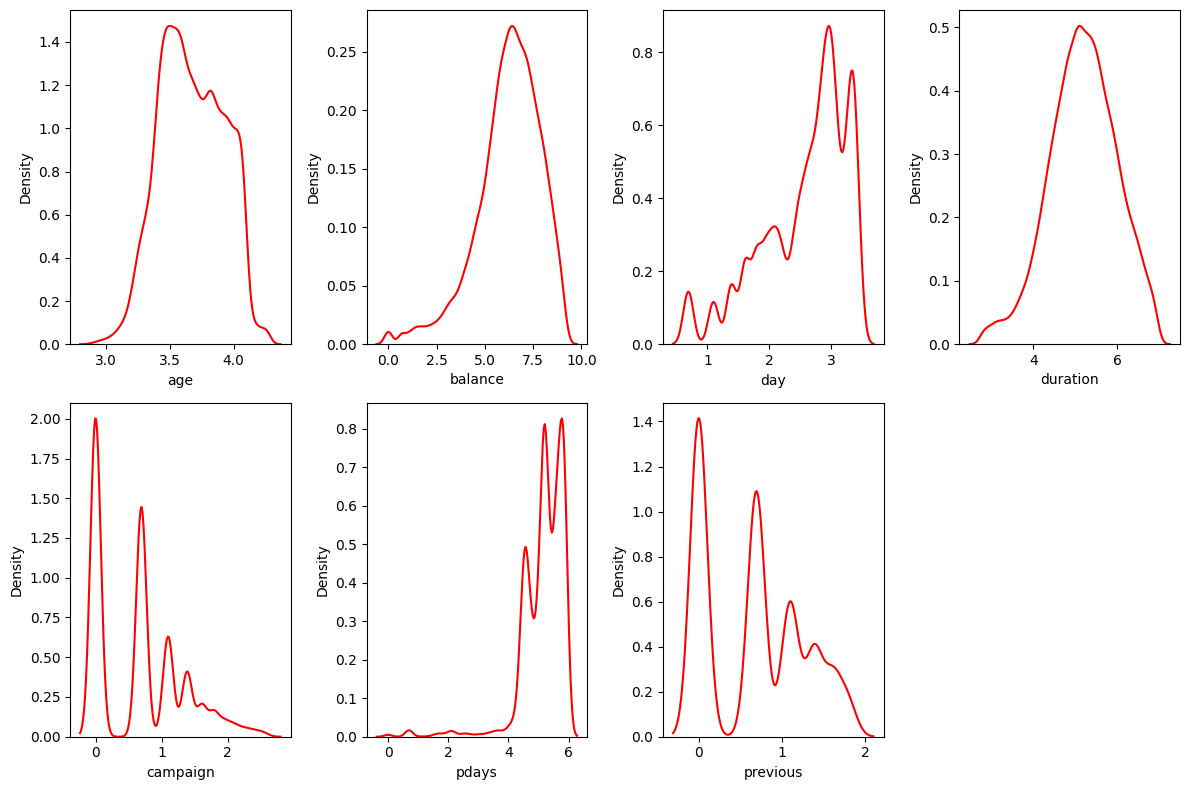

In [30]:
plt.figure(figsize = (12,8))
for i in range(0, len(nums)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(np.log(dftrain[nums[i]]), color = 'red')
  plt.tight_layout()
plt.show()

## 4.Feature Transformation
### Kita tidak akan menggunakan ini, dikarenakan kita tidak memiliki data numerik dengan tipe kontinu, kita akan lanjut ke tahap selanjutnya dan menggunakan one hot encoding dan label encoding

#### tetapi untuk tahap modelling, mungkin kita akan menggunakan feature transformation ini untuk melihat performance dari model yang di transform dengan yang tidak
#### untuk sementara kita tidak pakai feature transformation

## harus pakai feature transformation yaaa

# #duration, balance, age, day, campaign, pdays, previous perlu di transform lalu di scalling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# nums = dftrain.select_dtypes('int').columns

# minmaxscalers = {}
# for i in nums:
#   minmaxscaler = MinMaxScaler()
#   dftrain[i + '_norm']  = minmaxscaler.fit_transform(dftrain[i].values.reshape(len(dftrain), 1))

#   minmaxscalers[i] = minmaxscaler

In [ ]:
# trans = ['age_norm', 'balance_norm', 'duration_norm', 'campaign_norm', 'day_norm', 'pdays_norm', 'previous_norm']
# desc_trans = pd.DataFrame()
# for i in trans:
#   describe = dftrain[i].describe()
#   desc_trans[i] = describe

# print(desc_trans)

## 5.Feature Encoding

In [33]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn import preprocessing

In [34]:
dftrain.head()
#duration, balance, age, day, campaign, pdays, previous perlu di transform lalu di scalling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
#Encode kolom menggunakan label encoding
label_encoder = preprocessing.LabelEncoder()
nominal_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
for name in nominal_cols:
  dftrain[name] = label_encoder.fit_transform(dftrain[name])

mapping_dictionary = {"education" : {"tertiary" : 3, "secondary" : 2, "primary" : 1, "unknown" : 0},
                      "default" :{"yes" : 1 , "no" : 0},
                      "housing"  :{"yes" : 1 , "no" : 0},
                      "loan" :{"yes" : 1 , "no" : 0} ,
                      "y" :{"yes" : 1, "no" : 0}
                      }

dftrain = dftrain.replace(mapping_dictionary)

# replace_dictionary = {
#     "month": {
#         "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
#         "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
#     }
#}
#code diatas untuk month itu tidak ada kastanya, maka harusnya pakai one hot encoding, nanti di ganti ya!!
dftrain.replace(replace_dictionary, inplace=True)

In [36]:
  #encode kolom job, marital, contact, poutcome menggunakan one hot encoding
  #karena datanya tidak bisa di urutkan kastanya dan tidak mengandung yes/no
month = pd.get_dummies(dftrain['month'], prefix = 'month_')
job = pd.get_dummies(dftrain['job'], prefix = 'job')
marital = pd.get_dummies(dftrain['marital'], prefix = 'status')
contact = pd.get_dummies(dftrain['contact'], prefix = 'contact_via')
poutcome = pd.get_dummies(dftrain['poutcome'], prefix = 'result')

dftrain = pd.concat([dftrain, job, marital, contact, poutcome], axis = 1)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,status_0,status_1,status_2,contact_via_0,contact_via_1,contact_via_2,result_0,result_1,result_2,result_3
0,58,4,1,2,0,2143,1,0,2,5,...,0,1,0,0,0,1,0,0,0,1
1,44,9,2,1,0,29,1,0,2,5,...,0,0,1,0,0,1,0,0,0,1
2,33,2,1,1,0,2,1,1,2,5,...,0,1,0,0,0,1,0,0,0,1
3,47,1,1,3,0,1506,1,0,2,5,...,0,1,0,0,0,1,0,0,0,1
4,33,11,2,3,0,1,0,0,2,5,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dftrain.info()

### Catatan : mungkin kolom month diapus nantinya

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


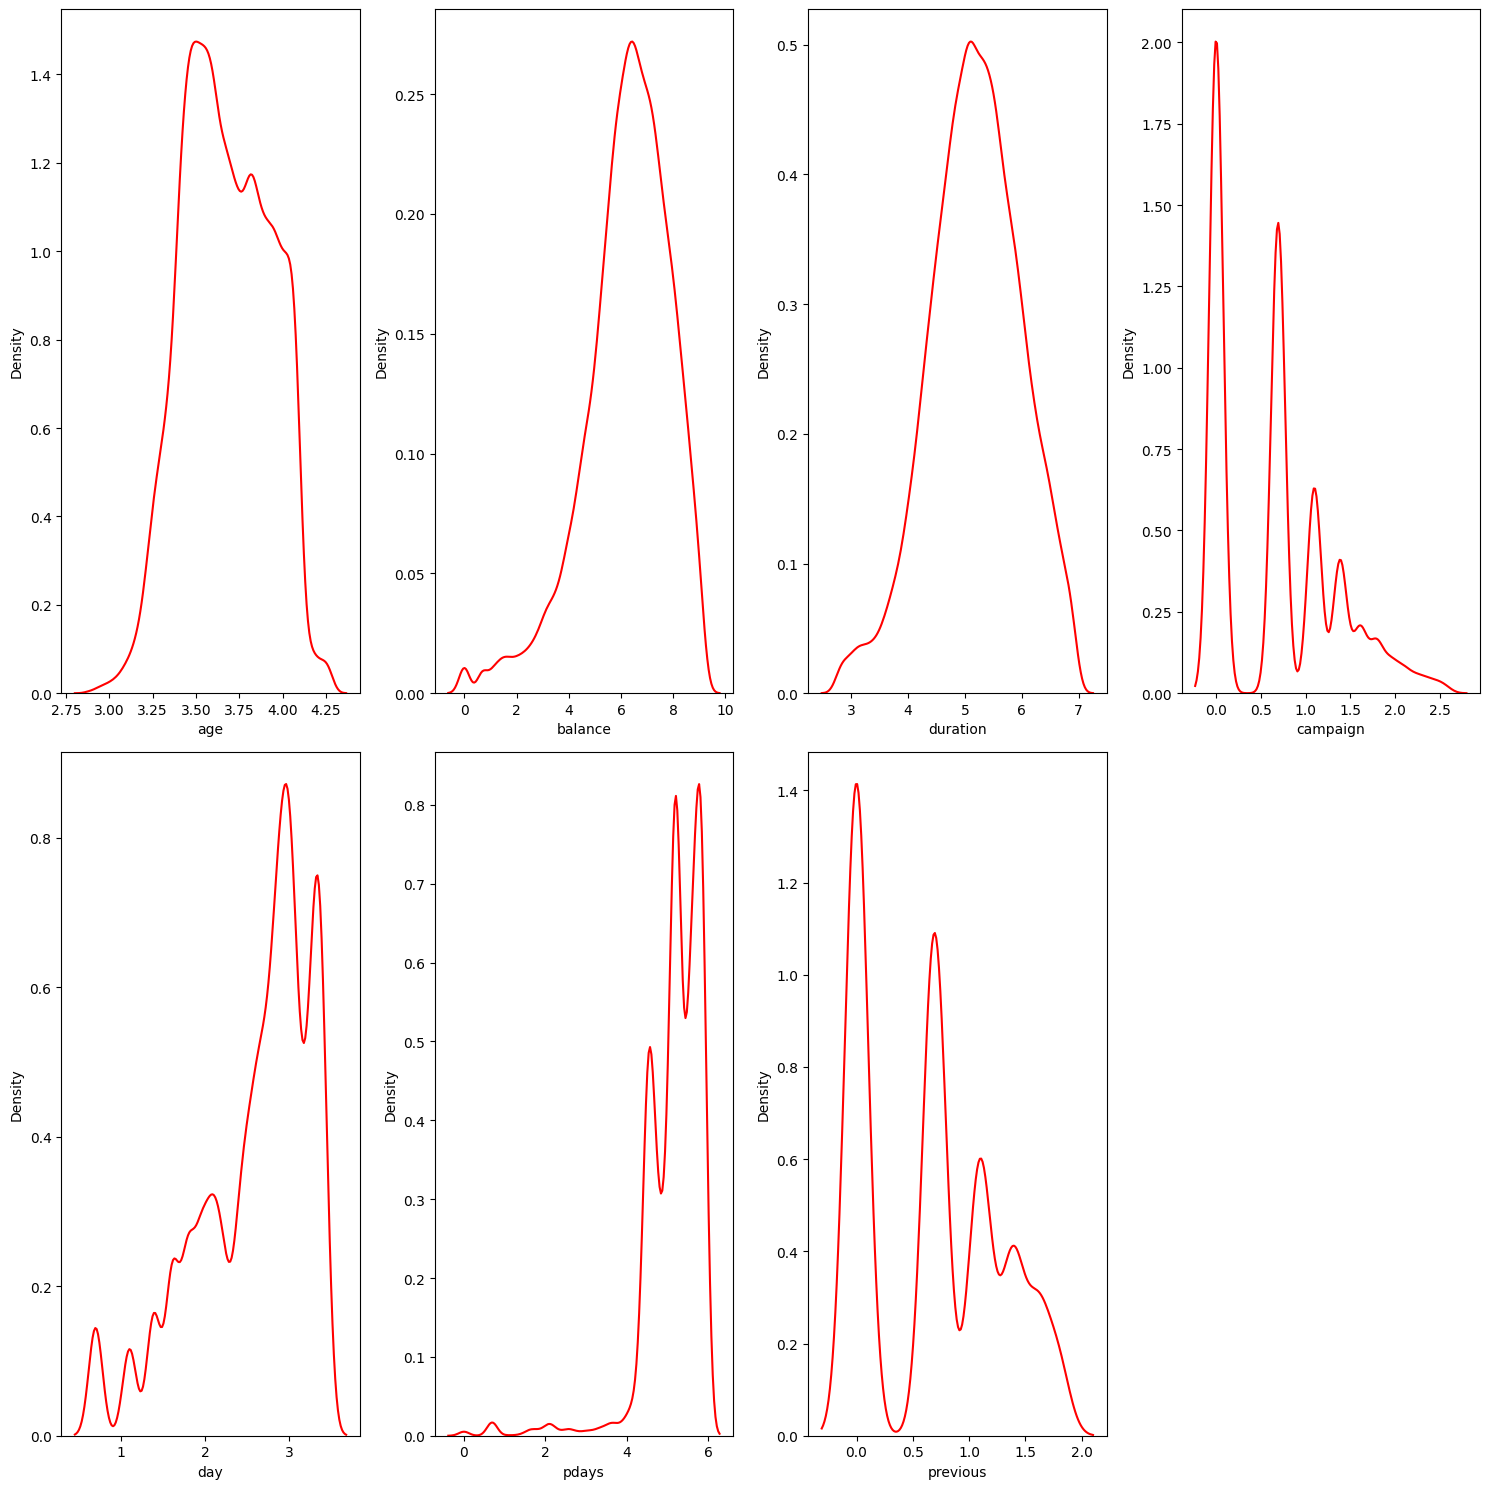

In [39]:
#log transformation
nums = ['age', 'balance', 'duration', 'campaign', 'day', 'pdays', 'previous']
plt.figure(figsize = (15,15))
for i in range(0 ,len(nums)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(np.log(dftrain[nums[i]]), color = 'red')
  plt.tight_layout()
plt.show()

## 6.Handle Class Imbalance
### disini kita menggunakan SMOTE

In [54]:
dftrain.shape

(39228, 40)

In [61]:
#lihat class imbalance
dftrain['y_class'] = dftrain['y']
value_count = dftrain['y_class'].value_counts()
percentage = dftrain['y_class'].value_counts(normalize = True)

result = pd.DataFrame({'total' : value_count, 'percentage' : percentage * 100})
result

,total,percentage
0,35242,89.838891
1,3986,10.161109


In [98]:
dftrain['y_class']

0        0
1        0
2        0
3        0
4        0
        ..
45202    1
45203    1
45205    1
45207    1
45209    0
Name: y_class, Length: 36813, dtype: int64

####customer yang tidak melakukan deposit mencapai 89.9%, sedangkan customer yang melakukan deposit hanya 10.1%.

In [62]:
train_X = dftrain[[col for col in dftrain.columns if col not in ['y_class', 'y']]].values
train_y = dftrain['y'].values
print(train_X.shape)
print(train_y.shape)

#catatan : itu X nya pakai kapital ya

(39228, 38)
(39228,)


In [63]:
from imblearn import over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(train_X, train_y)
print(pd.Series(y_over_SMOTE).value_counts())

0    35242
1    35242
dtype: int64


# untuk handle imbalance kita akan pakai class_weight = ‘balance’
## pembobotan nya kelas minoritas akan di beratkan

# Tahap Data Cleansing Selesai

# ini masuknya ke feature selection, tapi diliat dulu korelasinya (fitri)
## Kita drop kolom yang cukup bermasalah
### day dan month : karena data ini berasal dari tahun 2008 - 2010
##### fit ini gua bikin komen dulu sebagai penanda atau acuan lu nanti

In [ ]:
# dftrain.drop(['day', 'month'], axis = 1)

# Ini adalah tahap Feature Engineering

## Feature Selection

In [73]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39228 entries, 0 to 45209
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            39228 non-null  int64
 1   job            39228 non-null  int64
 2   marital        39228 non-null  int64
 3   education      39228 non-null  int64
 4   default        39228 non-null  int64
 5   balance        39228 non-null  int64
 6   housing        39228 non-null  int64
 7   loan           39228 non-null  int64
 8   contact        39228 non-null  int64
 9   day            39228 non-null  int64
 10  month          39228 non-null  int64
 11  duration       39228 non-null  int64
 12  campaign       39228 non-null  int64
 13  pdays          39228 non-null  int64
 14  previous       39228 non-null  int64
 15  poutcome       39228 non-null  int64
 16  y              39228 non-null  int64
 17  job_0          39228 non-null  uint8
 18  job_1          39228 non-null  uint8
 19  job_

Text(0.5, 1.0, 'korelasi_heatmap')

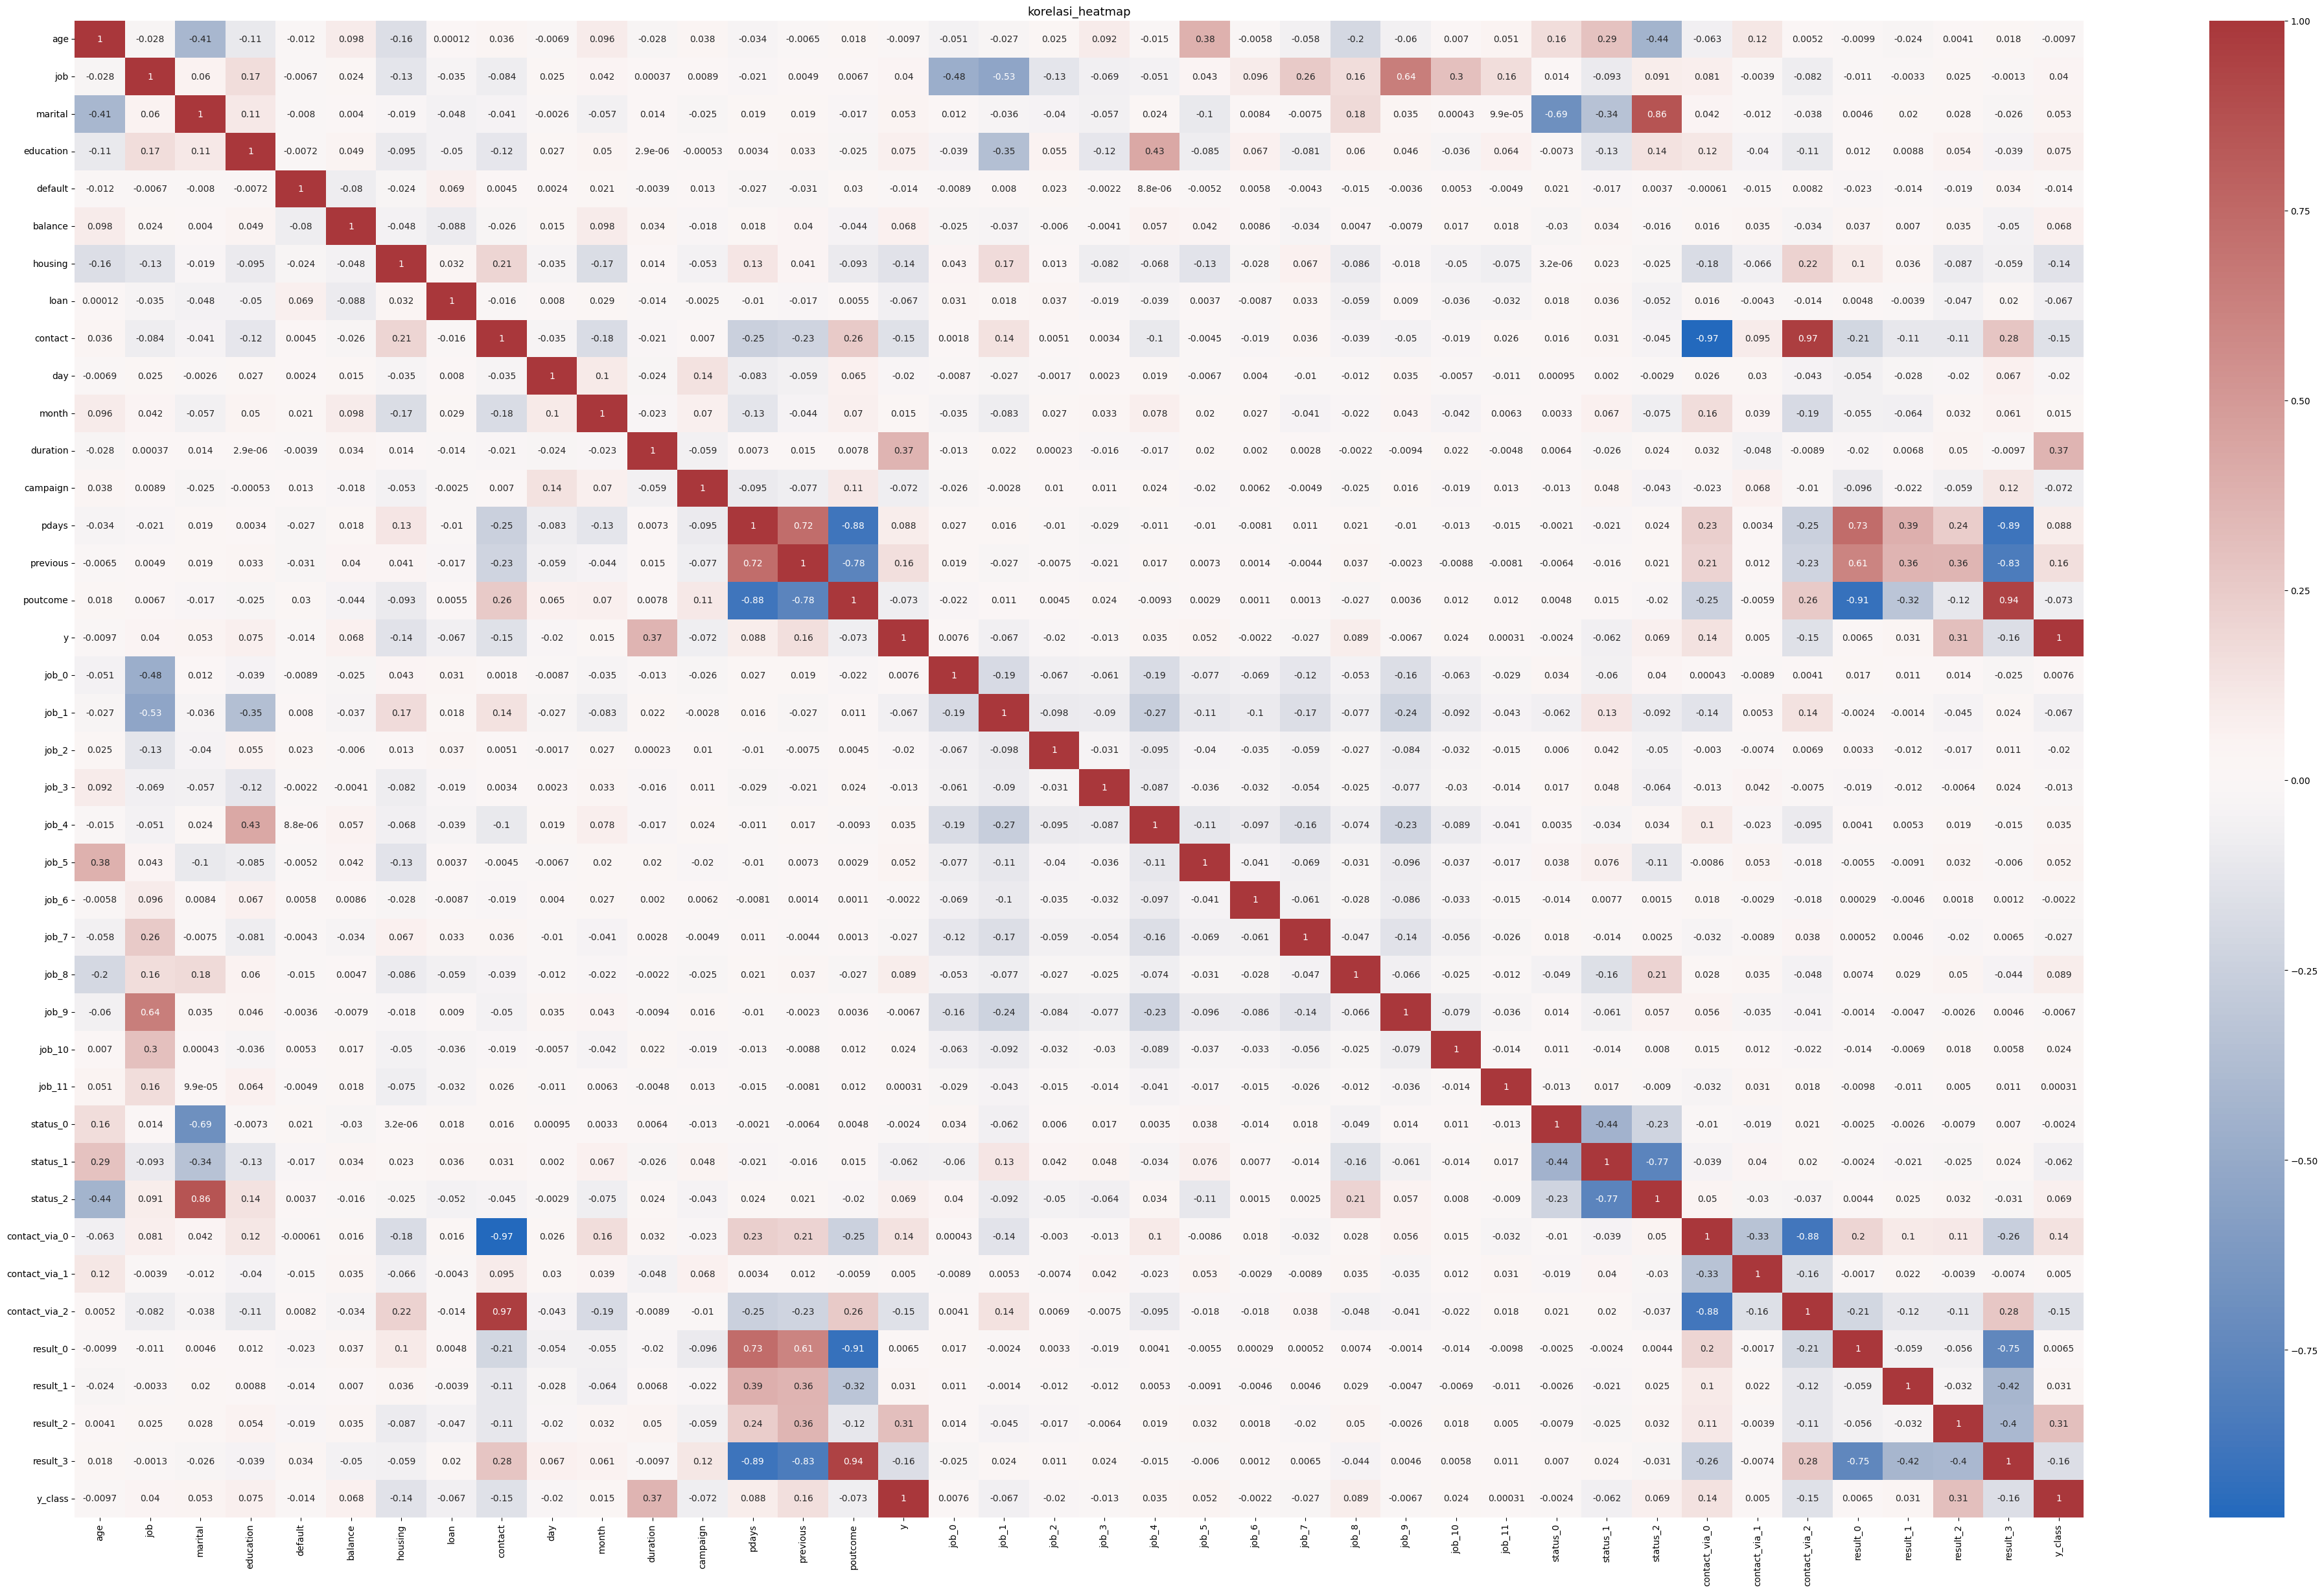

In [77]:
#lihat korelasi antar fitur
plt.figure(figsize=(50,30))
heatmap = sns.heatmap(dftrain.corr(), annot = True, cmap = 'vlag')
heatmap.set_title("korelasi_heatmap", fontdict={'fontsize':15})

Koefisien kolerasi antar fitur, beberapa memiliki kolerasi yang sangat signifikan sehingga salah satu fitur tersebut akan dihapus dari model untuk menghindari overfitting. kolom contact-contactvia2 0.97, kolom poutcome-result03 0.94, kolom y_class

Month dihapus karna termasuk kolom yang cukup bermasalah, berasal dari tahun 2008 - 2010. sedangkan di dataset tidak ada kolom tahun

Month nya tetap di pertahankan, y_class di hapus

In [ ]:
dftrain = dftrain.drop(['contact', 'poutcome', 'y_class'], axis = 1)

## Evaluasi Korelasi

In [82]:
dftrain.corr()['y'].sort_values()

result_3        -0.163096
contact_via_2   -0.149084
housing         -0.141448
campaign        -0.071622
job_1           -0.067085
loan            -0.066926
status_1        -0.062284
job_7           -0.026815
job_2           -0.019882
day             -0.019679
default         -0.014415
job_3           -0.012987
age             -0.009728
job_9           -0.006682
status_0        -0.002418
job_6           -0.002209
job_11           0.000308
contact_via_1    0.004972
result_0         0.006458
job_0            0.007625
job_10           0.024337
result_1         0.030672
job_4            0.035288
job              0.040046
job_5            0.052167
marital          0.052716
balance          0.067715
status_2         0.069346
education        0.074830
pdays            0.087519
job_8            0.088589
contact_via_0    0.139936
previous         0.157432
result_2         0.308441
duration         0.368304
y                1.000000
y_class          1.000000
Name: y, dtype: float64

Dari nilai koefisien korelasi di atas, terlihat rata-rata nilai korelasinya berada di bawah 0,1 dan juga di atas -0,1. Hal ini menunjukkan bahwa hubungan antara target dan fitur lainnya relatif lemah. Fitur dengan nilai korelasi lebih besar dari 0,1 dan kurang dari -0,1 yang akan digunakan.

Mengunakan fitur yang memiliki korelasi lebih besar dari 0,1 dan kurang dari -0,1 untuk memeriksa data anomali.

In [83]:
dftrain.corr()['y'][dftrain.corr()['y']>0.1]

duration         0.368304
previous         0.157432
y                1.000000
contact_via_0    0.139936
result_2         0.308441
y_class          1.000000
Name: y, dtype: float64

In [84]:
dftrain.corr()['y'][dftrain.corr()['y']<-0.1]

housing         -0.141448
contact_via_2   -0.149084
result_3        -0.163096
Name: y, dtype: float64

In [85]:
outliers = dftrain[['duration',
                    'previous',
                    'y',
                    'contact_via_0',
                    'result_2',
                    'y_class',
                    'housing',
                    'contact_via_2',
                    'result_3']]

In [86]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=077867de9322687cd80603b504997587913723908fa9d35b709ebccd1512f83b
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod


In [87]:
from pyod.models.knn import KNN

In [95]:
model = KNN()
model.fit(outliers)
outliers['is_outlier'] =  model.predict(outliers) == 1
outliers_knn = outliers['is_outlier'].sum()
print("Number of Anomalies: ", outliers_knn)

Number of Anomalies:  2415


<ipython-input-95-925201cfe09e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['is_outlier'] =  model.predict(outliers) == 1


In [89]:
outliers

,duration,previous,y,contact_via_0,result_2,y_class,housing,contact_via_2,result_3,is_outlier
0,261,0,0,0,0,0,1,1,1,False
1,151,0,0,0,0,0,1,1,1,False
2,76,0,0,0,0,0,1,1,1,False
3,92,0,0,0,0,0,1,1,1,False
4,198,0,0,0,0,0,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...
45203,266,0,1,1,0,1,0,0,1,False
45205,386,0,1,1,0,1,0,0,1,False
45206,977,0,1,1,0,1,0,0,1,False
45207,456,0,1,1,0,1,0,0,1,False


In [96]:
outlier_keys = list(outliers[outliers['is_outlier'] == 1].index)
good_keys = list(set(outliers.index) - set(outlier_keys))

In [97]:
dftrain = dftrain.drop(outlier_keys)
dftrain.shape

(36813, 37)

### gaji karyawan berdasarkan pekerjaan

### menggunakan nilai minimum

1. blue collar
2. management
3. service
4. student
5. unknown
6.


Feature extraction

In [ ]:
def categori_usia(age):
    if age < 25:
        return "Remaja"
    elif age < 45:
        return "Dewasa"
    else:
        return "Lansia"

In [ ]:
dftrain['kelompok_usia'] = dftrain['age'].apply(categori_usia)
dftrain.head()

NameError: ignored

In [ ]:
dftrain['level_balance'] = pd.cut(dftrain['balance'], bins=3, labels=['low', 'medium', 'high'])
dftrain.head()

In [ ]:
# Batas bawah dan atas kategori
low_category = dftrain[dftrain['level_balance'] == 'low']['balance'].agg(['min', 'max'])
medium_category = dftrain[dftrain['level_balance'] == 'medium']['balance'].agg(['min', 'max'])
high_category = dftrain[dftrain['level_balance'] == 'high']['balance'].agg(['min', 'max'])

print("Rentang untuk kategori 'low':", low_category['min'], "sampai", low_category['max'])
print("Rentang untuk kategori 'medium':", medium_category['min'], "sampai", medium_category['max'])
print("Rentang untuk kategori 'high':", high_category['min'], "sampai", high_category['max'])


In [ ]:
def categori_campaign(campaign):
    if campaign < 5:
        return "tidak sering"
    elif campaign < 15:
        return "cukup sering"
    else:
        return "sering"

In [ ]:
dftrain['frequent_campaign'] = dftrain['campaign'].apply(categori_campaign)
dftrain.head()

Biaya Kampanye
kepikirannya dengan menghitung berapa lama durasi telephonenya
di dataset lama durati itu hanya untuk "kontak terakhir yang dilakukan"
jadi mikirnya gimana kalo diumpamakan durasi dari setiap telephone pada setia klien disamakan sama durasi dari telephone terakhir yang dilakukan
(Duration dikalikan dengan campaign) trus dikalikan dengan biaya telepon
Untuk biayanya 0.395 euro per menit


In [ ]:
dftrain['biaya_campaign'] = (dftrain['duration'] * dftrain['campaign'])*(0.395/60)
dftrain.head()